In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from corner import corner

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '04')

pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'SyntheticImage_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 3377 pickle(s) in /data/bwedig/mejiro/roman_hlwas_dev/04


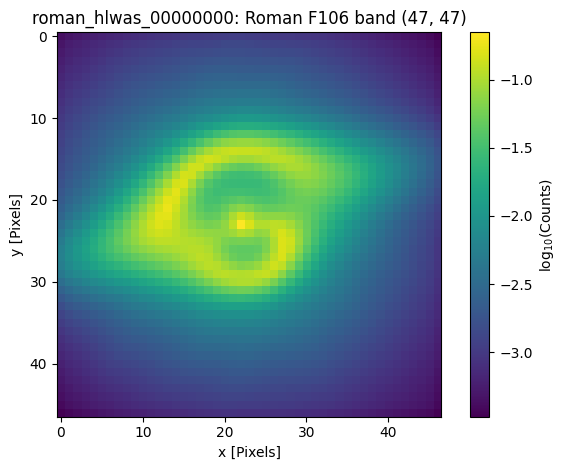

In [6]:
sample = util.unpickle(pickles[0])
sample.plot()

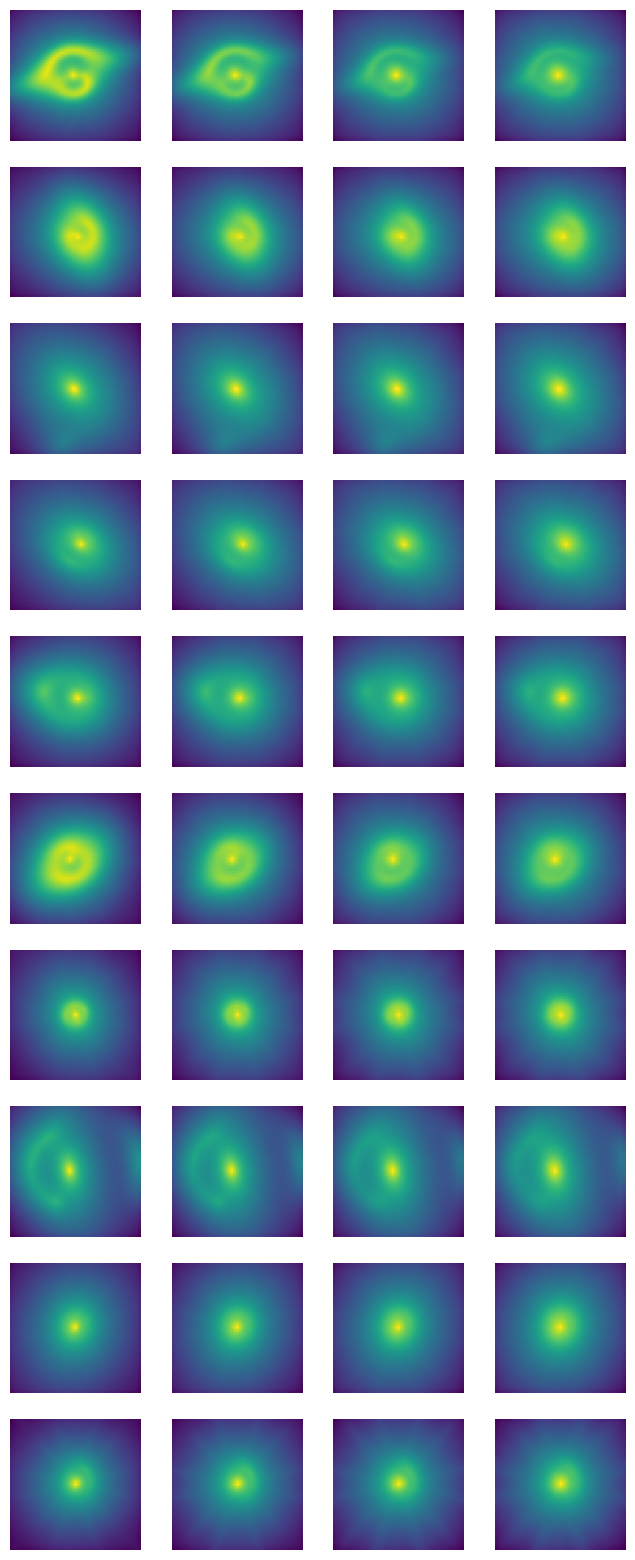

In [13]:
_, ax = plt.subplots(10, 4, figsize=(8, 20))

for i in range(40):
    sample = util.unpickle(pickles[i])
    ax[i // 4, i % 4].imshow(np.log10(sample.image))
    ax[i // 4, i % 4].axis('off')

plt.show()